# 多项式拟合  
对一组输入T = {(x1,y1), (x2,y2), (xn,yn)}做多项式拟合  
训练数据随机生成：参数为多项式参数数目num，随机生成(0, 1)之间若干个训练数据和测试数据  
并随机产生噪声，在sin函数的基础上  
模型：多项式模型，logistic回归模型  
策略：最小平方误差，最大似然估计  
方法：直接求伪逆矩阵解析法(最小二乘法)，梯度上升法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class fit:
    def __init__(self,dataSize=100):
        # 数据生成
        self.dataSize = dataSize
        
        # 判断传入的参数类型，如果targetM传入为空，随机初始化，否则按照用户输入初始化
        # isinstance(object, class or type)
        '''if isinstance(targetM, list):
            if len(targetM) == 0:
                self.targetM = np.random.rand(self.num)
            else:
                self.targetM = np.array(targetM, dtype='float64')
                self.num = self.targetM.shape[0]
        elif isinstance(targetM, np.ndarray):
            if targetM.shape[0] == 0:
                self.targetM = np.random.rand(self.num)
            else:
                self.targetM = targetM.astype('float64')
                self.num = self.targetM.shape[0]'''
        # 生成训练和测试数据
        self.generate()

        # 模型：多项式模型
        '''self.weightsNum = self.num if weightsNum == 0 else weightsNum'''
        self.weights = np.ones([3,]).astype('float64')/10
        
        # 策略：lossfunction，最小均方差
        
        # 方法：梯度下降法
        
    def generate(self):
        # np.random.rand(shape), 随机数在0,1之间
        self.trainX = np.random.rand(self.dataSize)
        # w0 + w1x + w2x**2 + ... + wnx**n
        self.trainY = self.funcSin(self.trainX)
        # 产生高斯噪声，(0, 0.02)
        self.trainX += np.random.randn(self.dataSize)*0.02
        self.trainY += np.random.randn(self.dataSize)*0.02
        self.testX = np.random.rand(self.dataSize)
        self.testY = self.funcSin(self.testX)
    
    def func(self, X):
        matX = X**0
        # np.vstack(tup):垂直堆叠，对行进行堆叠
        # np.hstack(tup):水平堆叠，对列进行堆叠
        for i in range(1, self.weights.shape[0]):
            matX = np.vstack((matX, X**i))
        return matX.T.dot(self.targetM)
    
    def funcSin(self, X):
        # sin
        return np.sin(X*np.pi)
    
    def LSM(self, X, Y, order):
        # The least square method 最小二乘法
        # the pseudo inverse 求伪逆矩阵
        matX = self.getMatX(X, order)
        matX = np.linalg.pinv(matX.T)
        self.weights = matX.dot(Y)
        
    def lossfunc(self, predict, target):
        # 均方误差
        loss = ((predict - target)**2).sum()
        return loss
    
    def lossMLE(self, data, target):
        X = self.getMatX(data, self.weights.shape[0])
        targetY = self.sigmoid(target)
        return targetY.T.dot(X.T.dot(self.weights))
    
    def forword(self, inputData):
        matX = self.getMatX(inputData, self.weights.shape[0])
        predict = matX.T.dot(self.weights)
        return predict
    
    def train(self, data, target, order=3, epoch=10000, lr=0.1, regularization=False, lamda=0.5):
        self.weights = np.ones([order,]).astype('float64')/10
        matX = self.getMatX(data, self.weights.shape[0])
        if regularization==False:
            for i in range(epoch):
                self.weights += lr*matX.dot(self.sigmoid(target) - self.logisticR(data))
                if i%1000==0:
                    print(i,self.lossMLE(data, target))
        else:
            for i in range(epoch):
                self.weights += lr*(matX.dot(self.sigmoid(target) - self.logisticR(data)) - lamda*self.weights)
                #self.weights += lr*(matX.dot(self.sigmoid(target) - self.logisticR(data)) - lamda*self.weights/((self.weights**2).sum()))
                if i%1000==0:
                    print(i, self.lossMLE(data, target))
    
    def gd(self, data, target, dimension=3, epoch=10000, lr=0.1):
        #不会写优化方式
        #gradient descent
        self.weights = np.ones([dimension,]).astype('float64')/10
        matX = self.getMatX(data, self.weights.shape[0])
        for i in range(epoch):
            self.weights -= lr*(1./self.dataSize)*(matX.dot(matX.T.dot(self.weights) - target))
            if i%1000==0:
                print(i, (0.5/self.dataSize)*(((matX.T.dot(self.weights) - target)**2).sum()))
    
    def logisticR(self, data):
        matX = self.getMatX(data, self.weights.shape[0])
        return self.sigmoid(matX.T.dot(self.weights))
    
    def sigmoid(self, X):
        return 1./(1+np.exp(-X))
    
    def getMatX(self, X, num):
        # 范德蒙德矩阵
        matX = X**0
        for i in range(1, num):
            matX = np.vstack((matX, X**i))
        return matX
    
    #显示结果
    #显示随机的多项式函数
    def drawTarget(self):
        x = np.arange(0, 1, 0.01)
        matx = self.getMatX(x, self.weights.shape[0])
        y = self.funcSin(x)
        predictY = matx.T.dot(self.weights)
        plt.plot(x,y,'r')
        plt.plot(x,predictY,'y')
        plt.plot(self.trainX, self.trainY, 'o')
        plt.axis([0,1,0,1])
        #plt.plot(self.testX, self.testY, 'o')
        plt.show()

## MLE VS LSE VS LMS

### MLE(极大似然估计）

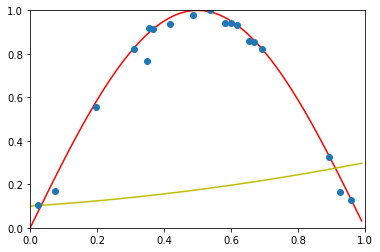

In [26]:
fitter = fit(dataSize=20)
fitter.drawTarget()

0 6.18524466414
1000 9.0640051944
2000 9.17139068942
3000 9.18926150717
4000 9.19217313962
5000 9.19264601804
6000 9.19272277921
7000 9.19273523863


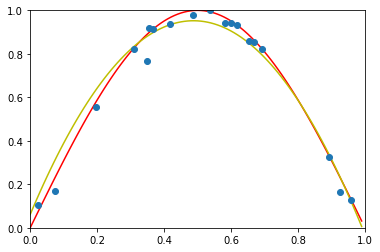

In [27]:
fitter.train(fitter.trainX, fitter.trainY, order=3, epoch=8000, lr=0.1)
fitter.drawTarget()

In [28]:
print(fitter.weights)

[ 0.06130952  3.65476264 -3.74796573]


### LMS(均方最小误差)gradient descent

0 0.147753687137
1000 0.0266963052543
2000 0.0135014404992
3000 0.00744116250574
4000 0.00465773349399
5000 0.00337933057719
6000 0.00279217207206
7000 0.00252249566126


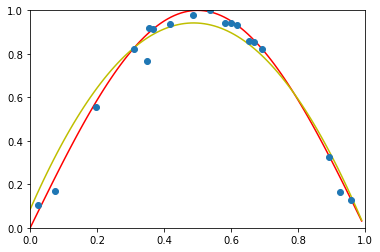

In [41]:
fitter.gd(fitter.trainX, fitter.trainY, dimension=3, epoch=8000, lr=0.1)
fitter.drawTarget()

In [42]:
print(fitter.weights)

[ 0.08521372  3.51229279 -3.59894784]


### LSE(最小二乘法）

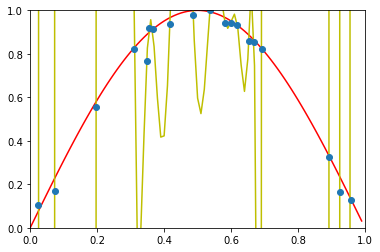

In [32]:
fitter.LSM(fitter.trainX, fitter.trainY, 50)
fitter.drawTarget()

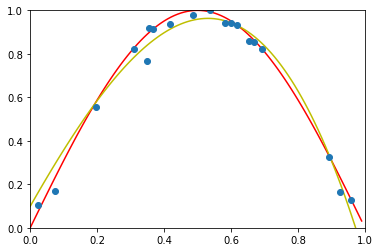

In [33]:
fitter.LSM(fitter.trainX, fitter.trainY, 4)
fitter.drawTarget()

<div class="burk">
## regularization</div><i class="fa fa-lightbulb-o "></i>

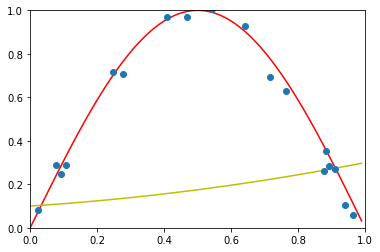

In [72]:
myFit = fit(dataSize=20)
myFit.drawTarget()

0 3.73623077808
1000 7.35461696253
2000 7.38338695385
3000 7.39838055605
4000 7.40586655363
5000 7.40957807312
6000 7.41145632061
7000 7.41245472288
8000 7.41303052506
9000 7.41340078851


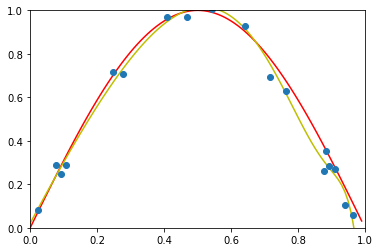

In [75]:
myFit.train(myFit.trainX, myFit.trainY, order=50, epoch=10000, lr=0.1, regularization=False, lamda=0.5)
myFit.drawTarget()

In [76]:
myFit.weights

array([ 0.02093832,  2.88663428, -0.62868629, -1.48886363, -1.27740247,
       -0.80498826, -0.3587744 , -0.01925859,  0.20760648,  0.33985851,
        0.40043589,  0.41033368,  0.38660873,  0.342268  ,  0.28681523,
        0.22695145,  0.16723307,  0.11062362,  0.05893063,  0.01313991,
       -0.02633424, -0.05946497, -0.0864793 , -0.10776229, -0.12378938,
       -0.13507924, -0.14216149, -0.14555534, -0.1457558 , -0.14322548,
       -0.13839008, -0.13163669, -0.1233137 , -0.11373204, -0.10316707,
       -0.09186093, -0.08002513, -0.06784313, -0.05547304, -0.04305006,
       -0.03068891, -0.018486  , -0.00652157,  0.00513849,  0.01644092,
        0.02734347,  0.03781359,  0.04782706,  0.05736696,  0.0664226 ])

0 4.01134779286
1000 7.28244004263
2000 7.28585115307
3000 7.28625091533
4000 7.28635984189
5000 7.28639067367
6000 7.2863994061
7000 7.28640188089
8000 7.28640258306
9000 7.28640278259


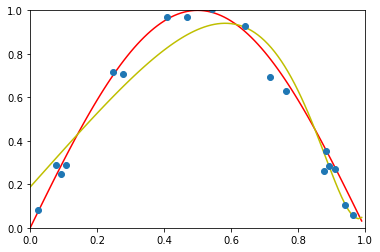

In [80]:
myFit.train(myFit.trainX, myFit.trainY, order=20, epoch=10000, lr=0.1, regularization=True, lamda=0.01)
myFit.drawTarget()

In [64]:
myFit.weights

array([ 0.15409115,  2.13338758, -0.38813939, -0.89589861, -0.75086306,
       -0.51364731, -0.32119499, -0.18826159, -0.10230874, -0.04873344,
       -0.01625927,  0.00285077,  0.01365035,  0.0193627 ,  0.02201682,
        0.02287868,  0.02273152,  0.02205481,  0.0211374 ,  0.02014903,
        0.01918536,  0.01829649,  0.01750486,  0.01681658,  0.01622851,
        0.01573267,  0.01531892,  0.01497655,  0.0146952 ,  0.01446534,
        0.01427849,  0.01412726,  0.01400533,  0.01390736,  0.0138289 ,
        0.01376624,  0.01371633,  0.01367667,  0.01364524,  0.01362039,
        0.01360078,  0.01358534,  0.01357321,  0.01356369,  0.01355625,
        0.01355044,  0.01354592,  0.0135424 ,  0.01353967,  0.01353756])

### 问题  
λ的选择，过大直接拟合欠佳。  
过小导致有没有正则项都一样。  
### 效果  
确实会让参数变小